In [1]:
import pandas as pd
data = pd.read_csv('data\Mobil Listrik no_label.csv')
data.head()

,full_text
0,4/9 Secara ekonomi mengajak seseorang beralih ...
1,@innovacommunity Pantas mobil listrik sepi ter...
2,@tempodotco Baiknya dikembangkan sendiri misal...
3,Alternator pada mobil tidak hanya berperan seb...
4,@arif_brata Kalau Rebecca di modif jadi mobil ...


In [2]:
data.shape

(686, 1)

In [3]:
data.isnull().sum()

full_text    0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  686 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [6]:
import re

def casefolding(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [7]:
raw_sample = data['full_text'].iloc[1]
case_folding = casefolding(raw_sample)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Preprocessing

Raw_data	: @innovacommunity Pantas mobil listrik sepi ternyata ada musuhnya

Case Folding	: pantas mobil listrik sepi ternyata ada musuhnya


In [8]:
key_norm = pd.read_csv('data\key_norm.csv')
print(key_norm.head(10))

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


(4388, 3)

In [9]:
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm["singkat"] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

In [10]:
raw_sample = data['full_text'].iloc[2]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi

Raw_data	: @tempodotco Baiknya dikembangkan sendiri misalnya mobil ESEMKA dibuat jadi mobil listrik dan baterainya dibuat sendiri gimana Cocok....

Case Folding	: baiknya dikembangkan sendiri misalnya mobil esemka dibuat jadi mobil listrik dan baterainya dibuat sendiri gimana cocok

Normalisasi	: baiknya dikembangkan sendiri misalnya mobil esemka dibuat jadi mobil listrik dan baterainya dibuat sendiri bagaimana cocok


In [11]:
# ------ Tokenizing ---------
import nltk
nltk.download('punkt')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize

# NLTK word tokenize
def word_tokenize_wrapper(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert the list of tokens to a string without square brackets
    tokens_str = ', '.join(tokens)
    return tokens_str

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
raw_sample = data['full_text'].iloc[2]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize) # Data Setelah di Tokenize

Raw_data	: @tempodotco Baiknya dikembangkan sendiri misalnya mobil ESEMKA dibuat jadi mobil listrik dan baterainya dibuat sendiri gimana Cocok....

Case Folding	: baiknya dikembangkan sendiri misalnya mobil esemka dibuat jadi mobil listrik dan baterainya dibuat sendiri gimana cocok

Normalisasi	: baiknya dikembangkan sendiri misalnya mobil esemka dibuat jadi mobil listrik dan baterainya dibuat sendiri bagaimana cocok

Tokenize	: baiknya, dikembangkan, sendiri, misalnya, mobil, esemka, dibuat, jadi, mobil, listrik, dan, baterainya, dibuat, sendiri, bagaimana, cocok


In [13]:
!pip install stopwords


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stopwords_ind = stopwords.words('indonesian')
more_stopword = ['daring', 'online', 'pd']

def remove_stop_words(text):
    sw = stopwords_ind + more_stopword
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [16]:
raw_sample = data['full_text'].iloc[8]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)
stopwords = remove_stop_words(tokenize)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize) # Data Setelah di Tokenize
print('\nStopwords\t:', stopwords) # Data Setelah di Stopwords

Raw_data	: @MrOngDedy kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Case Folding	: kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Normalisasi	: kalau dipikir pikir saya seperti mau mobil listrik saja lihat bensin ini

Tokenize	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin, ini

Stopwords	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin,


In [17]:
!pip install Sastrawi


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [19]:
raw_sample = data['full_text'].iloc[8]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)
stopwords = remove_stop_words(tokenize)
stemmed = stemming(stopwords)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize) # Data Setelah di Tokenize
print('\nStopwords\t:', stopwords) # Data Setelah di Stopwords
print('\nStemming\t:', stemmed) # Data Setelah di Stemming

Raw_data	: @MrOngDedy kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Case Folding	: kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Normalisasi	: kalau dipikir pikir saya seperti mau mobil listrik saja lihat bensin ini

Tokenize	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin, ini

Stopwords	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin,

Stemming	: kalau pikir pikir saya seperti mau mobil listrik saja lihat bensin


In [20]:
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = word_tokenize_wrapper(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [21]:
%%time
data['clean_text'] = data['full_text'].apply(text_preprocessing_process)

CPU times: total: 3min 54s
Wall time: 4min 25s


In [22]:
data

,full_text,clean_text
0,4/9 Secara ekonomi mengajak seseorang beralih ...,49 cara ekonomi ajak orang alih dari kendara m...
1,@innovacommunity Pantas mobil listrik sepi ter...,pantas mobil listrik sepi nyata ada musuh
2,@tempodotco Baiknya dikembangkan sendiri misal...,baik kembang sendiri misal mobil esemka buat j...
3,Alternator pada mobil tidak hanya berperan seb...,alternator pada mobil tidak hanya peran bagai ...
4,@arif_brata Kalau Rebecca di modif jadi mobil ...,kalau rebecca di modif jadi mobil listrik sama...
...,...,...
681,@OCHN utk kasus nissan kicks (series hybrid) s...,untuk kasus nissan kicks series hybrid sama pe...
682,@EllatheriaOfc @AM_EllaJKT48 Mobil listrik,mobil listrik
683,beli mobil listrik biar mengurangi polusi udara,beli mobil listrik biar kurang polusi udara
684,Buat yg mo beli mobil jgn buru2 krn skrg trend...,buat yang mau beli mobil jangan buru2 karena s...


In [23]:
data.isnull().sum()

full_text     0
clean_text    0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.shape

(686, 2)

In [26]:
!pip install textblob


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from textblob import TextBlob

labels = []
scores = []

# Iterate over the clean_text column in your DataFrame
for text in data['clean_text']:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        label = 'Positif'
    elif polarity < 0:
        label = 'Negatif'
    else:
        label = 'Netral'
    
    scores.append(polarity)
    labels.append(label)

# Add the sentiment scores and labels to the DataFrame
data['sentimen'] = labels
data['sentimen_score'] = scores

new_data = data[['clean_text', 'sentimen_score', 'sentimen']]

new_data.head(5)

,clean_text,sentimen_score,sentimen
0,49 cara ekonomi ajak orang alih dari kendara m...,0.0,Netral
1,pantas mobil listrik sepi nyata ada musuh,0.0,Netral
2,baik kembang sendiri misal mobil esemka buat j...,0.0,Netral
3,alternator pada mobil tidak hanya peran bagai ...,0.0,Netral
4,kalau rebecca di modif jadi mobil listrik sama...,0.0,Netral


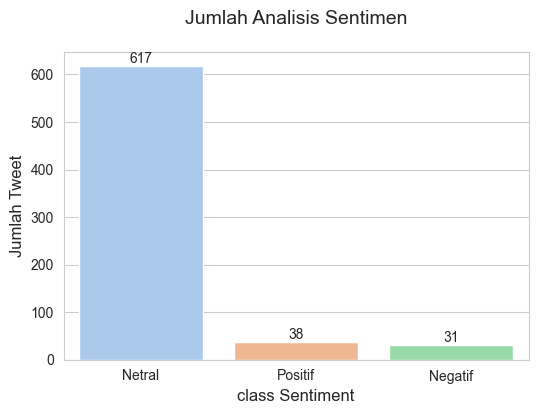

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = new_data['sentimen'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')
    
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data.sentimen = le.fit_transform(new_data.sentimen.values)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11788\1350481467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.sentimen = le.fit_transform(new_data.sentimen.values)


In [30]:
negatif = new_data[new_data['sentimen'] == 0]
netral = new_data[new_data['sentimen'] == 1]
positif = new_data[new_data['sentimen'] == 2]

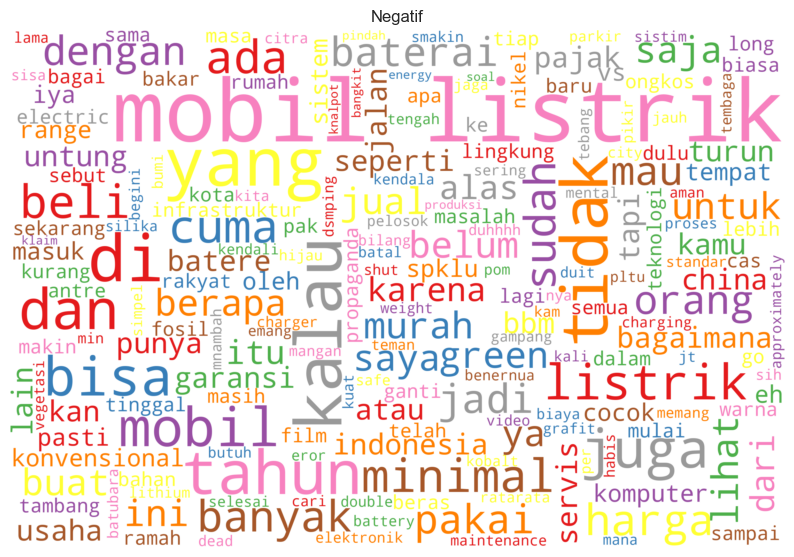

In [31]:
from wordcloud import WordCloud

all_text_s0 = ' '.join(word for word in negatif["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Negatif')
plt.show()

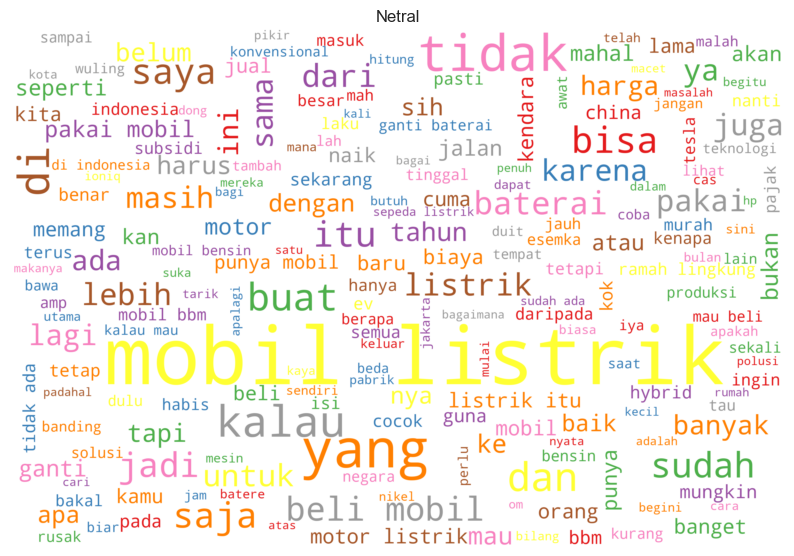

In [32]:
all_text_s0 = ' '.join(word for word in netral["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Netral')
plt.show()

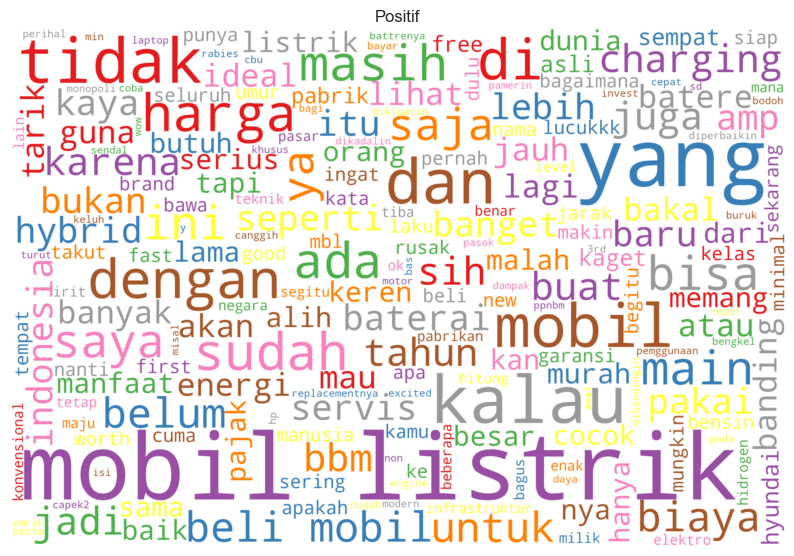

In [33]:
all_text_s0 = ' '.join(word for word in positif["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Positif')
plt.show()

In [45]:
X = new_data['clean_text']
y = new_data['sentimen']

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(random_state=42)

In [49]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
def evaluate_model(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=kf)
    labels = np.unique(y)
    cm = confusion_matrix(y, y_pred, labels=labels)
    report = classification_report(y, y_pred, labels=labels)
    return cm, report

In [50]:
def find_best_k(model, X, y, k_values):
    best_k = 0
    best_score = 0
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kf)
        avg_score = np.mean(scores)
        print(f'K: {k}, Cross-Validation Accuracy: {avg_score:.4f}')
        if avg_score > best_score:
            best_score = avg_score
            best_k = k
    return best_k, best_score

In [51]:
k_values = range(2, 11)
best_k_nb, best_score_nb = find_best_k(nb_model, X_resampled, y_resampled, k_values)
print(f'Best K for Naive Bayes: {best_k_nb}, Best Cross-Validation Accuracy: {best_score_nb:.4f}')

K: 2, Cross-Validation Accuracy: 0.8833
K: 3, Cross-Validation Accuracy: 0.8984
K: 4, Cross-Validation Accuracy: 0.9092
K: 5, Cross-Validation Accuracy: 0.9109
K: 6, Cross-Validation Accuracy: 0.9136
K: 7, Cross-Validation Accuracy: 0.9119
K: 8, Cross-Validation Accuracy: 0.9162
K: 9, Cross-Validation Accuracy: 0.9163
K: 10, Cross-Validation Accuracy: 0.9179
Best K for Naive Bayes: 10, Best Cross-Validation Accuracy: 0.9179


In [52]:
best_k_rf, best_score_rf = find_best_k(rf_model, X_resampled, y_resampled, k_values)
print(f'Best K for Random Forest: {best_k_rf}, Best Cross-Validation Accuracy: {best_score_rf:.4f}')

K: 2, Cross-Validation Accuracy: 0.9887
K: 3, Cross-Validation Accuracy: 0.9924
K: 4, Cross-Validation Accuracy: 0.9903
K: 5, Cross-Validation Accuracy: 0.9919
K: 6, Cross-Validation Accuracy: 0.9924
K: 7, Cross-Validation Accuracy: 0.9919
K: 8, Cross-Validation Accuracy: 0.9903
K: 9, Cross-Validation Accuracy: 0.9908
K: 10, Cross-Validation Accuracy: 0.9914
Best K for Random Forest: 3, Best Cross-Validation Accuracy: 0.9924


In [53]:
kf_nb = KFold(n_splits=best_k_nb, shuffle=True, random_state=42)
kf_rf = KFold(n_splits=best_k_rf, shuffle=True, random_state=42)

In [55]:
nb_cm, nb_report = evaluate_model(nb_model, X_resampled, y_resampled, best_k_nb)
print("Naive Bayes Confusion Matrix:\n", nb_cm)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Confusion Matrix:
 [[617   0   0]
 [ 77 465  75]
 [  0   0 617]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       617
           1       1.00      0.75      0.86       617
           2       0.89      1.00      0.94       617

    accuracy                           0.92      1851
   macro avg       0.93      0.92      0.91      1851
weighted avg       0.93      0.92      0.91      1851



In [56]:
rf_cm, rf_report = evaluate_model(rf_model, X_resampled, y_resampled, best_k_rf)
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Confusion Matrix:
 [[612   5   0]
 [  0 617   0]
 [  0   9 608]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       617
           1       0.98      1.00      0.99       617
           2       1.00      0.99      0.99       617

    accuracy                           0.99      1851
   macro avg       0.99      0.99      0.99      1851
weighted avg       0.99      0.99      0.99      1851



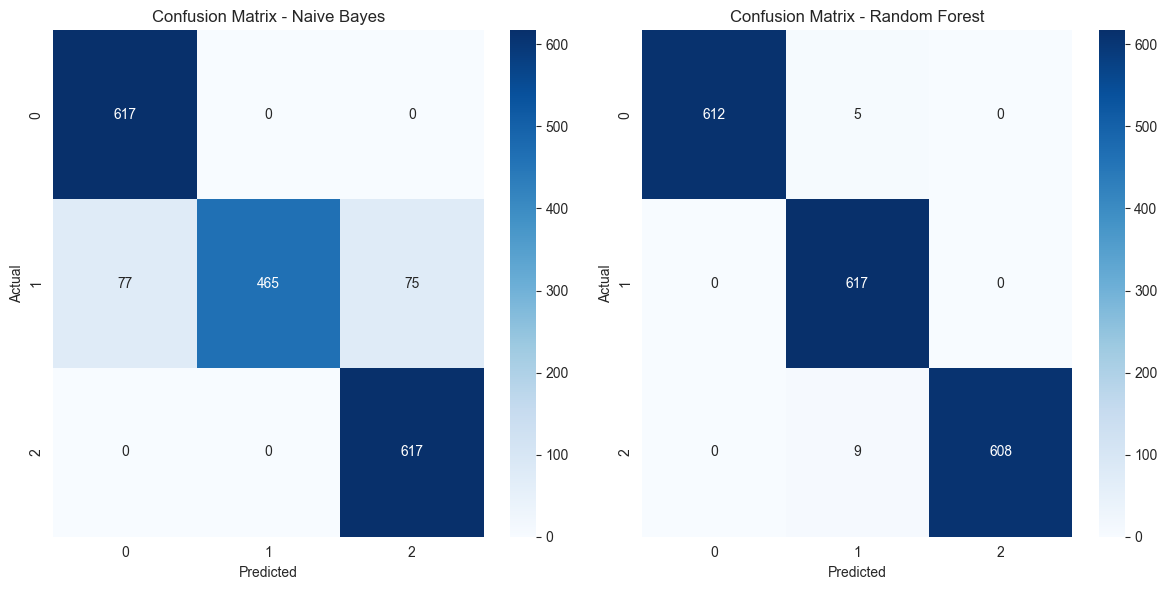

In [58]:
# Plot confusion matrix untuk Naive Bayes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix untuk Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [59]:
import pickle

In [60]:
nb_model.fit(X_resampled, y_resampled)

MultinomialNB()

In [61]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [62]:
with open('best_nb_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, nb_model), file)

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, rf_model), file)

In [63]:
with open('best_nb_model.pkl', 'rb') as file:
    vectorizer, best_nb_model = pickle.load(file)

with open('best_rf_model.pkl', 'rb') as file:
    vectorizer, best_rf_model = pickle.load(file)

In [64]:
sample_texts = ['Saya sangat senang dengan produk ini']
vectorize = vectorizer.transform(sample_texts)

In [65]:
nb_predictions = best_nb_model.predict(vectorize)
rf_predictions = best_rf_model.predict(vectorize)

In [66]:
print('Naive Bayes Predictions:', nb_predictions)
print('Random Forest Predictions:', rf_predictions)

Naive Bayes Predictions: [2]
Random Forest Predictions: [1]
